In [1]:
from evo.core import metrics
from evo.core.units import Unit
from evo.tools import log
log.configure_logging(verbose=True, debug=True, silent=False)

import pprint
import numpy as np

from evo.tools import plot
import matplotlib.pyplot as plt

# temporarily override some package settings
from evo.tools.settings import SETTINGS
SETTINGS.plot_usetex = False

plot.apply_settings(SETTINGS)
%matplotlib inline

[DEBUG][2024-11-03 14:23:17,415][log.configure_logging():113]
System info:
Python 3.8.20
Linux-5.4.0-150-generic-x86_64-with-glibc2.17
kid@kid-seg



In [2]:
from evo.tools import file_interface
from evo.core import sync
from rosbags.rosbag1 import Reader as Rosbag1Reader
import numpy as np

# 绕y轴旋转180度
r1 = np.array([
    [-1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, -1, 0],
    [0 , 0 ,0 ,1]
])

r2 = np.array([
    [0, 0, 1, 0],
    [1, 0, 0, 0],
    [0, 0, -1, 0],
    [0 , 0 ,0 ,1]
])

with Rosbag1Reader("gt.bag") as reader0, Rosbag1Reader("aloam.bag") as reader1, Rosbag1Reader("scaloam.bag") as reader2,Rosbag1Reader("fastlio.bag") as reader3, Rosbag1Reader("legoloam.bag") as reader4:
    traj_gt = file_interface.read_bag_trajectory(reader0, "/Odometry")
    traj_lego = file_interface.read_bag_trajectory(reader4, "/integrated_to_init")
    # 应用坐标变换
    traj_gt.transform(r1)
    traj_lego.transform(r2)
    traj_aloam = file_interface.read_bag_trajectory(reader1, "/aft_mapped_to_init")
    traj_scaloam = file_interface.read_bag_trajectory(reader2, "/aft_mapped_to_init")
    traj_fastlio= file_interface.read_bag_trajectory(reader3, "/Odometry")
# traj_gt, traj_fastlio = sync.associate_trajectories(traj_gt, traj_fastlio)
# traj_gt, traj_aloam = sync.associate_trajectories(traj_gt, traj_aloam)
# traj_gt, traj_scaloam = sync.associate_trajectories(traj_gt, traj_scaloam)
# traj_gt, traj_lego = sync.associate_trajectories(traj_gt, traj_lego)

[DEBUG][2024-11-03 14:23:18,675][file_interface.read_bag_trajectory():328]
Loaded 1341 nav_msgs/msg/Odometry messages of topic: /Odometry
[DEBUG][2024-11-03 14:23:18,717][file_interface.read_bag_trajectory():328]
Loaded 1344 nav_msgs/msg/Odometry messages of topic: /integrated_to_init
[DEBUG][2024-11-03 14:23:18,956][file_interface.read_bag_trajectory():328]
Loaded 1328 nav_msgs/msg/Odometry messages of topic: /aft_mapped_to_init
[DEBUG][2024-11-03 14:23:19,133][file_interface.read_bag_trajectory():328]
Loaded 1331 nav_msgs/msg/Odometry messages of topic: /aft_mapped_to_init
[DEBUG][2024-11-03 14:23:19,374][file_interface.read_bag_trajectory():328]
Loaded 1340 nav_msgs/msg/Odometry messages of topic: /Odometry


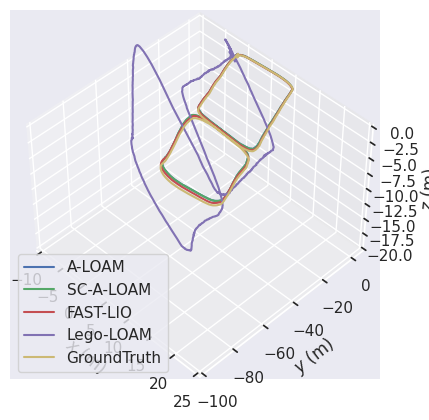

In [7]:
fig = plt.figure()
traj_by_label = {
    "A-LOAM": traj_aloam,
    "SC-A-LOAM": traj_scaloam,
    "FAST-LIO": traj_fastlio,
    "Lego-LOAM": traj_lego,
     "GroundTruth": traj_gt
}
plot.trajectories(fig, traj_by_label, plot.PlotMode.xyz)
current_ax = plt.gca()
# current_ax.axis('equal')
current_ax.set_xlim([-10,25])
current_ax.set_ylim([-100,5])
current_ax.set_zlim([-20,0])
current_ax.view_init(elev=45, azim=-45)
plt.savefig('slam.png')
plt.show()